### 시퀀스 배열로 다루는 순환 신경망(RNN)

#### 1.LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

#데이터 학습&테스트 분리
(X_train, y_train),(X_test,y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [2]:
category = np.max(y_train)+1
print(category,'카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
#pad_sequence 메서드를 사용해 길이를 100으로 맞춰줌 (패딩 작업)
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:

#모델 구조 설정
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

#모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#조기 종료 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

#모델 실행
history = model.fit(X_train,y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test),
                    callbacks=[early_stopping_callback])

#테스트 정확도 출력
print(f'Test Accuracy :  {model.evaluate(X_test,y_test)[1]:.4f}')


Epoch 1/200
450/450 [==============================] - 34s 46ms/step - loss: 2.2378 - accuracy: 0.4409 - val_loss: 2.0764 - val_accuracy: 0.4884
Epoch 2/200
450/450 [==============================] - 18s 41ms/step - loss: 1.7669 - accuracy: 0.5511 - val_loss: 1.6670 - val_accuracy: 0.5788
Epoch 3/200
450/450 [==============================] - 19s 43ms/step - loss: 1.5795 - accuracy: 0.6034 - val_loss: 1.5817 - val_accuracy: 0.6149
Epoch 4/200
450/450 [==============================] - 20s 45ms/step - loss: 1.3996 - accuracy: 0.6431 - val_loss: 1.3972 - val_accuracy: 0.6518
Epoch 5/200
450/450 [==============================] - 19s 43ms/step - loss: 1.2441 - accuracy: 0.6798 - val_loss: 1.2987 - val_accuracy: 0.6781
Epoch 6/200
450/450 [==============================] - 19s 43ms/step - loss: 1.1129 - accuracy: 0.7132 - val_loss: 1.2360 - val_accuracy: 0.6892
Epoch 7/200
450/450 [==============================] - 19s 42ms/step - loss: 1.0023 - accuracy: 0.7457 - val_loss: 1.1761 - val_ac

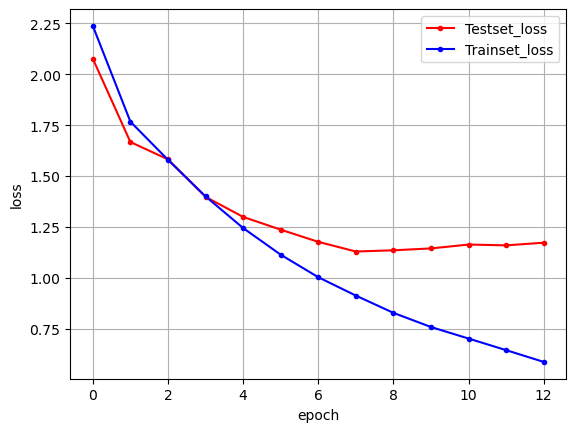

In [5]:
#학습셋과 테스트셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid('--')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train),(X_test,y_test) = imdb.load_data(num_words=5000)

print(X_train.shape)

(25000,)


In [3]:
#단어수 맞춰주기 (패딩)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

#모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.build(input_shape=(None,100))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25,
                    callbacks=[early_stopping_callback])

print(f'Test Accuracy : {model.evaluate(X_test,y_test)[1]:.4f}')

Epoch 1/100
469/469 [==============================] - 9s 11ms/step - loss: 0.3993 - accuracy: 0.8035 - val_loss: 0.2634 - val_accuracy: 0.8910
Epoch 2/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2394 - accuracy: 0.9060 - val_loss: 0.2651 - val_accuracy: 0.8922
Epoch 3/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1872 - accuracy: 0.9296 - val_loss: 0.2638 - val_accuracy: 0.8936
Epoch 4/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1422 - accuracy: 0.9485 - val_loss: 0.2709 - val_accuracy: 0.8950
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1124 - accuracy: 0.9612 - val_loss: 0.3010 - val_accuracy: 0.8878
Epoch 6/100
782/782 [==============================] - 3s 4ms/step - loss: 0.3335 - accuracy: 0.8822
Test Accuracy : 0.8822


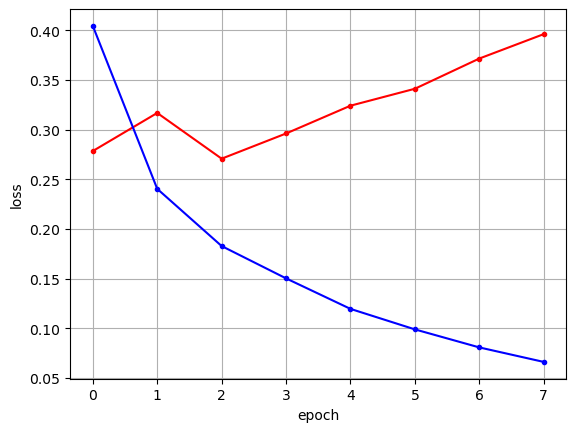

In [10]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프 그리기
plt.grid('--')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from keras_self_attention import SeqSelfAttention
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)
# 단어의 수를 맞추어 줍니다.
# X_train = sequence.pad_sequences(X_train, maxlen=500)
# X_test = sequence.pad_sequences(X_test, maxlen=500)

#gpu가 터져서 학습불가라 크기를 줄임 500 -> 300
X_train = sequence.pad_sequences(X_train, maxlen=300)
X_test = sequence.pad_sequences(X_test, maxlen=300)

In [4]:
#모델 구조 설정

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=500, input_length=300))
model.add(Dropout(0.5))
model.add(LSTM(48, return_sequences=True))  # return_sequences=True 설정
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [5]:
# 모델 실행 옵션 (컴파일)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=8, epochs=100,
                  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])


Epoch 1/100
3125/3125 [==============================] - 356s 109ms/step - loss: 0.3227 - accuracy: 0.8578 - val_loss: 0.2548 - val_accuracy: 0.8953
Epoch 2/100
3125/3125 [==============================] - 330s 105ms/step - loss: 0.1977 - accuracy: 0.9240 - val_loss: 0.2630 - val_accuracy: 0.8892
Epoch 3/100
3125/3125 [==============================] - 310s 99ms/step - loss: 0.1458 - accuracy: 0.9450 - val_loss: 0.2874 - val_accuracy: 0.8868
Epoch 4/100
3125/3125 [==============================] - 347s 111ms/step - loss: 0.0967 - accuracy: 0.9659 - val_loss: 0.4180 - val_accuracy: 0.8807


### 트러블 슈팅

- gpu를 사용하여 학습 성능을 올리고자 하였으나, 환경설정 이슈가있었음
- 최종적으로 python = 3.10.3, tensorflow-gpu = 2.10.0, cuda = 11.2, cuDNN = 8.1 최종 설정
- 인식 성공

## 그런데
### ...쥬피터 커널이 터짐
- self-attention에서 연산행렬의 크기가 너무 커져서 그런것 같다는 분석
1. gpu를 동적할당 해보기 (실패)
2. 학습시 batch_size 줄이기 40 -> 20 -> 8 (효과없음)
3. max_len 줄이기 500->300 (성공!)
  - 주의사항
    - max_len을 줄이면 연산에 필요한 데이터의 양 자체가 줄어들기 때문에 메모리 관리에는 효과적일 수 있으나, 중요 정보가 소실될 수 있다.

In [ ]:
# 테스트 정확도를 출력합니다.
# 여기서 배치사이즈를 너무 크게해서 또 터진듯..
print( f"Test Accuracy : {model.evaluate(X_test, y_test,batch_size=8)[1] :.4f}")

: 

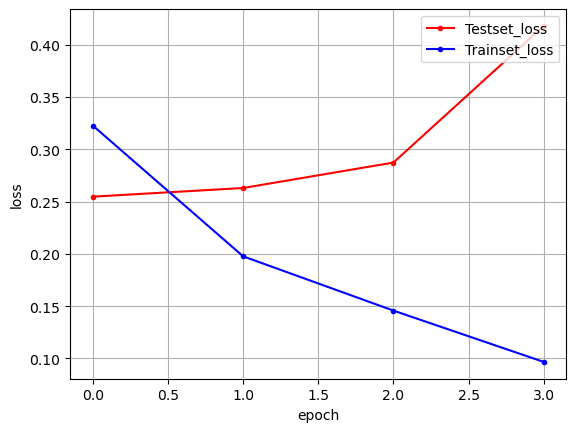

In [7]:
# 학습셋과 테스트셋의 오차를 저장+
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 그리기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid('--')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()